In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

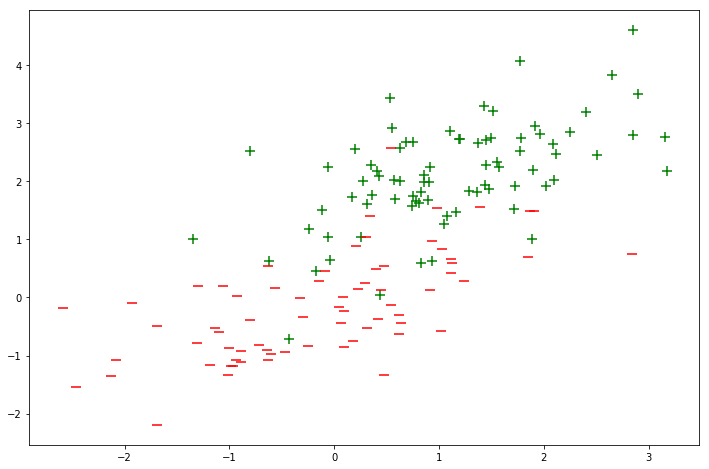

In [241]:

np.random.seed(45)

def make_classification_data(m=100):
    cov_factor = .7
    cov = [[1, cov_factor], [cov_factor, 1]]
    X_pos = np.random.multivariate_normal([1, 2], cov, m)
    X_neg = np.random.multivariate_normal([0, 0], cov, m)
    X = np.c_[np.ones(2*m), np.r_[X_pos, X_neg]]
    y = np.r_[np.ones(m), np.zeros(m)].reshape(-1, 1)
    return X, y

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, θ):
    return sigmoid(np.matmul(X, θ)) >= 0.5

def make_mesh(X, n=100):
    ovr = .2
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x1_min -= abs(x1_min) * ovr
    x1_max += abs(x1_max) * ovr
    
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
    x2_min -= abs(x2_min) * ovr
    x2_max += abs(x1_max) * ovr
    
    x1 = np.linspace(x1_min, x1_max, n)
    x2 = np.linspace(x2_min, x2_max, n)
    x1_mesh, x2_mesh = np.meshgrid(x1, x2)
    X_mesh = np.c_[np.ones(x1_mesh.size), x1_mesh.ravel(), x2_mesh.ravel()]
    return x1_mesh, x2_mesh, X_mesh


def plot_classification_data(X, y, θ=None, figsize=(12,8)):
    assert X.shape[0] == y.shape[0]
    assert y.shape[1] == 1
    
    plt.figure(figsize=figsize)
    
    pos_selector = y.ravel()==1
    plt.scatter(X[pos_selector, 1], X[pos_selector, 2], marker='+', s=100, c='g')
    plt.scatter(X[~pos_selector, 1], X[~pos_selector, 2], marker='_', s=100, c='r')
    if θ is not None:
        assert θ.shape[0] == X.shape[1]
        x1_mesh, x2_mesh, X_mesh = make_mesh(X)
        y_mesh = predict(X_mesh, θ).reshape(x1_mesh.shape)        
        plt.contourf(x1_mesh, x2_mesh, y_mesh, alpha=.3, cmap=ListedColormap(['r', 'g']))
        
        
X, y = make_classification_data(m=100)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plot_classification_data(X_train, y_train)

In [242]:
def linear_cost(X, y, θ):
    return np.sum(np.square(np.matmul(X, θ) - y))/(2*len(y))

def linear_gradient(X, y, θ):
    e = np.matmul(X, θ) - y
    dJ = np.matmul(X.T, e)/len(y)
    return dJ

def logistic_cost(X, y, θ):
    h = sigmoid(np.matmul(X, θ))
    inner_exp = y * np.log(h) + (1 - y) * np.log(1 - h)
    return -np.sum(inner_exp)/len(y_train)

def logistic_gradient(X, y, θ):
    e = sigmoid(np.matmul(X, θ)) - y
    dJ = np.matmul(X.T, e)/len(y)
    return dJ

def gradient_descent(X, y, lr=0.01, epochs=1000, ϵ=1e-4):
    θ = np.zeros((X.shape[1], 1))
    Jh = [logistic_cost(X, y, θ)]
    for epoch in range(epochs):
        dJ = logistic_gradient(X, y, θ)
        θ = θ - (lr * dJ)
        Jh.append(logistic_cost(X, y, θ))
        v = abs((Jh[-1] - Jh[-2])/Jh[-2])
        if v <= ϵ:
            print(f'Reached min at epoch {epoch}')
            break
        
    return θ, Jh

θ, Jh = gradient_descent(X_train, y_train)
θ

array([[-0.75542824],
       [ 0.21978769],
       [ 1.20078734]])

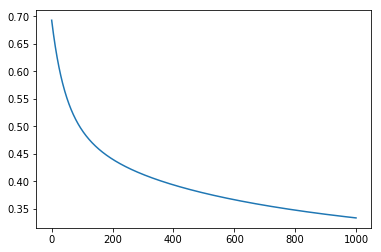

In [243]:
plt.plot(Jh)

In [244]:
# accuracy
y_predict = predict(X_test, θ)
np.sum(y_test == y_predict)/len(y_predict)

0.82

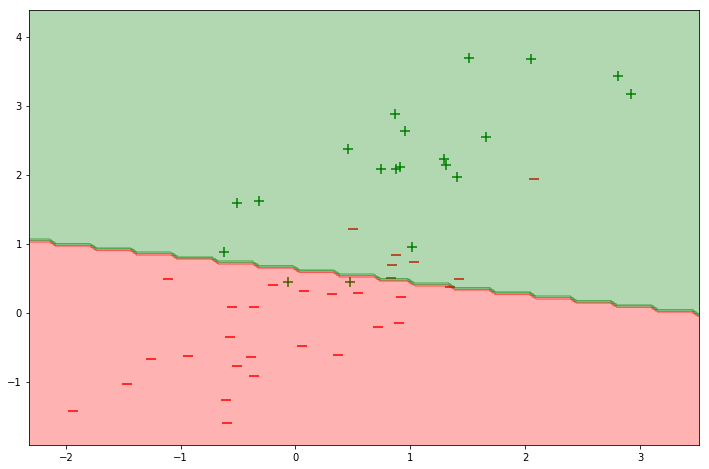

In [245]:
plot_classification_data(X_test, y_test, θ)